<a href="https://colab.research.google.com/github/Bhanukoya/Deep-Learning/blob/master/Deep_learning_classify__dogs%26cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practicing Deep learning to classify dogs and cats.
## Used ImageDataGenerator, Drop out, Batch Normalization 
##### This notebook takes lot of time to run (40mins)

In [ ]:
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

fatal: destination path 'dog-cat-full-dataset' already exists and is not an empty directory.


In [ ]:
from tensorflow import keras

In [ ]:
from keras.layers import Dense, Flatten,Conv2D, MaxPool2D, Dropout, BatchNormalization
from keras.models import Sequential

Using TensorFlow backend.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = datagen.flow_from_directory(directory ='/content/dog-cat-full-dataset/data/train', target_size=(150,150), 
                                              batch_size = 20, classes = ['dogs', 'cats'], class_mode = 'binary')

Found 20000 images belonging to 2 classes.


In [ ]:
len(train_generator)

1000

In [ ]:
print(train_generator)

In [ ]:
train_generator.batch_size

20

In [ ]:
train_generator.class_mode

'binary'

In [ ]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
validation_generator = datagen.flow_from_directory(directory='/content/dog-cat-full-dataset/data/test', 
                                                   batch_size= 5, target_size= (150,150), classes=['dogs', 'cats'], 
                                                 class_mode = 'binary'  )

Found 5000 images belonging to 2 classes.


In [ ]:
model = Sequential()

## With small Neural Network

In [ ]:
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='relu', input_shape= (150,150,3), kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(1, activation='sigmoid'))


In [ ]:
from keras.optimizers import RMSprop, SGD

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

model.fit_generator(train_generator, epochs=10, steps_per_epoch=20, verbose=1, validation_data=validation_generator, validation_steps=10)

Epoch 1/10
20/20 [==============================] - 8s 380ms/step - loss: 3.0626 - accuracy: 0.5000 - val_loss: 0.6861 - val_accuracy: 0.5200
Epoch 2/10
20/20 [==============================] - 1s 72ms/step - loss: 0.6790 - accuracy: 0.5425 - val_loss: 0.8495 - val_accuracy: 0.4600
Epoch 3/10
20/20 [==============================] - 2s 85ms/step - loss: 0.6881 - accuracy: 0.5450 - val_loss: 0.5254 - val_accuracy: 0.5000
Epoch 4/10
20/20 [==============================] - 2s 87ms/step - loss: 0.6798 - accuracy: 0.5650 - val_loss: 0.8785 - val_accuracy: 0.6400
Epoch 5/10
20/20 [==============================] - 2s 87ms/step - loss: 0.6825 - accuracy: 0.5525 - val_loss: 0.6664 - val_accuracy: 0.6200
Epoch 6/10
20/20 [==============================] - 2s 87ms/step - loss: 0.6696 - accuracy: 0.5550 - val_loss: 0.7413 - val_accuracy: 0.5000
Epoch 7/10
20/20 [==============================] - 2s 85ms/step - loss: 0.6639 - accuracy: 0.5875 - val_loss: 0.5789 - val_accuracy: 0.6400
Epoch 8/10
2

## With more convolutions

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='relu', input_shape= (150,150,3), kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

model.fit_generator(train_generator, epochs=10, steps_per_epoch=1000, verbose=1, validation_data=validation_generator, validation_steps=300)

Epoch 1/10
1000/1000 [==============================] - 65s 65ms/step - loss: 0.6378 - accuracy: 0.6370 - val_loss: 0.3283 - val_accuracy: 0.7047
Epoch 2/10
1000/1000 [==============================] - 64s 64ms/step - loss: 0.5207 - accuracy: 0.7430 - val_loss: 0.5615 - val_accuracy: 0.7693
Epoch 3/10
1000/1000 [==============================] - 64s 64ms/step - loss: 0.4421 - accuracy: 0.7940 - val_loss: 0.4973 - val_accuracy: 0.8020
Epoch 4/10
1000/1000 [==============================] - 64s 64ms/step - loss: 0.3614 - accuracy: 0.8382 - val_loss: 0.8894 - val_accuracy: 0.7787
Epoch 5/10
1000/1000 [==============================] - 64s 64ms/step - loss: 0.2594 - accuracy: 0.8910 - val_loss: 0.0694 - val_accuracy: 0.7900
Epoch 6/10
1000/1000 [==============================] - 65s 65ms/step - loss: 0.1490 - accuracy: 0.9443 - val_loss: 0.1667 - val_accuracy: 0.7867
Epoch 7/10
1000/1000 [==============================] - 64s 64ms/step - loss: 0.0950 - accuracy: 0.9680 - val_loss: 0.6463 -

## With Batch Normalization and Drop out

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='relu', input_shape= (150,150,3), kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=10, steps_per_epoch=1000, verbose=1, validation_data=validation_generator, validation_steps=300)

Epoch 1/10
1000/1000 [==============================] - 70s 70ms/step - loss: 1.3625 - accuracy: 0.5436 - val_loss: 0.7401 - val_accuracy: 0.5627
Epoch 2/10
1000/1000 [==============================] - 69s 69ms/step - loss: 0.7665 - accuracy: 0.5873 - val_loss: 0.6312 - val_accuracy: 0.6613
Epoch 3/10
1000/1000 [==============================] - 69s 69ms/step - loss: 0.6446 - accuracy: 0.6473 - val_loss: 0.4922 - val_accuracy: 0.5760
Epoch 4/10
1000/1000 [==============================] - 69s 69ms/step - loss: 0.5820 - accuracy: 0.6941 - val_loss: 0.4279 - val_accuracy: 0.6533
Epoch 5/10
1000/1000 [==============================] - 69s 69ms/step - loss: 0.5445 - accuracy: 0.7223 - val_loss: 0.3196 - val_accuracy: 0.7427
Epoch 6/10
1000/1000 [==============================] - 68s 68ms/step - loss: 0.5244 - accuracy: 0.7362 - val_loss: 0.4915 - val_accuracy: 0.6800
Epoch 7/10
1000/1000 [==============================] - 68s 68ms/step - loss: 0.4959 - accuracy: 0.7548 - val_loss: 0.2767 -

In [ ]:
history.history

{'accuracy': [0.54355,
  0.5873,
  0.6473,
  0.69415,
  0.7223,
  0.73625,
  0.7548,
  0.76905,
  0.78085,
  0.78125],
 'loss': [1.3625307291448117,
  0.7665164775252342,
  0.6445736401379109,
  0.5820339224040508,
  0.5445181144773961,
  0.5244058878719806,
  0.4958776321262121,
  0.4775017889589071,
  0.46249438405036924,
  0.45911543421447276],
 'val_accuracy': [0.562666654586792,
  0.6613333225250244,
  0.5759999752044678,
  0.653333306312561,
  0.7426666617393494,
  0.6800000071525574,
  0.7540000081062317,
  0.7446666955947876,
  0.7300000190734863,
  0.762666642665863],
 'val_loss': [0.7401307225227356,
  0.6311990022659302,
  0.4922138750553131,
  0.4279291033744812,
  0.3195647597312927,
  0.49146270751953125,
  0.2767293453216553,
  0.29456132650375366,
  0.3939579725265503,
  0.5347395539283752]}

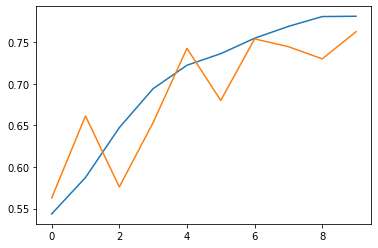

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

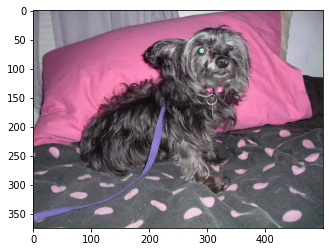

In [ ]:
from skimage import io
pic = io.imread('/content/dog-cat-full-dataset/data/test/dogs/dog.0.jpg')
import matplotlib.pyplot as plt

plt.imshow(pic)

In [ ]:
from keras.preprocessing import image

(150, 150, 3)


array([[[118., 116., 127.],
        [109., 107., 121.],
        [113., 111., 125.],
        ...,
        [137., 139., 151.],
        [133., 135., 147.],
        [133., 133., 141.]],

       [[121., 119., 130.],
        [112., 110., 124.],
        [114., 112., 126.],
        ...,
        [139., 141., 153.],
        [134., 136., 148.],
        [136., 136., 144.]],

       [[124., 122., 133.],
        [115., 113., 127.],
        [117., 115., 129.],
        ...,
        [142., 144., 156.],
        [136., 138., 150.],
        [137., 140., 147.]],

       ...,

       [[ 79.,  84.,  88.],
        [ 73.,  81.,  84.],
        [ 67.,  77.,  79.],
        ...,
        [ 71.,  80.,  85.],
        [ 62.,  71.,  76.],
        [ 61.,  71.,  73.]],

       [[ 73.,  78.,  82.],
        [ 71.,  79.,  82.],
        [ 68.,  78.,  80.],
        ...,
        [ 56.,  65.,  70.],
        [ 75.,  84.,  89.],
        [ 77.,  87.,  89.]],

       [[ 68.,  73.,  77.],
        [ 67.,  75.,  78.],
        [ 61.,  

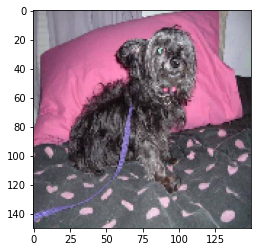

In [ ]:
img=image.load_img('/content/dog-cat-full-dataset/data/test/dogs/dog.0.jpg', target_size=(150, 150))

plt.imshow(img)

x = image.img_to_array(img)
print(x.shape)
x


In [ ]:
x = np.expand_dims(x, axis=0)
print(x.shape)
x


(1, 150, 150, 3)


array([[[[118., 116., 127.],
         [109., 107., 121.],
         [113., 111., 125.],
         ...,
         [137., 139., 151.],
         [133., 135., 147.],
         [133., 133., 141.]],

        [[121., 119., 130.],
         [112., 110., 124.],
         [114., 112., 126.],
         ...,
         [139., 141., 153.],
         [134., 136., 148.],
         [136., 136., 144.]],

        [[124., 122., 133.],
         [115., 113., 127.],
         [117., 115., 129.],
         ...,
         [142., 144., 156.],
         [136., 138., 150.],
         [137., 140., 147.]],

        ...,

        [[ 79.,  84.,  88.],
         [ 73.,  81.,  84.],
         [ 67.,  77.,  79.],
         ...,
         [ 71.,  80.,  85.],
         [ 62.,  71.,  76.],
         [ 61.,  71.,  73.]],

        [[ 73.,  78.,  82.],
         [ 71.,  79.,  82.],
         [ 68.,  78.,  80.],
         ...,
         [ 56.,  65.,  70.],
         [ 75.,  84.,  89.],
         [ 77.,  87.,  89.]],

        [[ 68.,  73.,  77.],
       

In [ ]:
model.predict(x)

array([[1.6090774e-25]], dtype=float32)

In [ ]:
model.predict_generator(train_generator)

array([[0.8806595 ],
       [0.5147277 ],
       [0.59162587],
       ...,
       [0.03629256],
       [0.47975662],
       [0.49923608]], dtype=float32)

## Model seems to be fitting the data well